In [ ]:
### Don't push "Run notebook"!!!

assert False, 'Please don\'t press the "Run notebook" button!'

AssertionError: Please don't press the "Run notebook" button!

# Imports & Loading Data

In [2]:
# Run this cell with Ctrl+Enter (or Cmd+Return on a Mac)

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from utils import *

# Set a plotting theme with seaborn
sns.set_theme() 

# Load our data
print('Loading data from Datasets folder...')

(geo_cnty, rep, dem, rep_st, dem_st) = load_data()

print('Finished loading data!')

Loading data from Datasets folder...
Finished loading data!


# 3. Cleaning the Data Panda-Monium
<p style='font-size:30px'>Data Manipulation</p>

![](.images/clean.jpeg)

To help with data manipulation we're going to take a closer look at another Python library, `pandas`. Luckily you've already been using `pandas` this whole time! In part **0. `import data_science`** we loaded all of our data in as `pandas` DataFrame objects and have been passing them as arguments to `seaborn` and `plotly` for visualization.

We imported pandas like this:
```python
import pandas as pd
```
so now we can reference `pandas` by its alias `pd`.

`pandas` is a Python library that makes it easier for us to clean and organize data for analysis and visualization. There are several functions that `pandas` has for dataframes that are extremely useful for this project.

![](.images/sad_panda.jpg)

<!-- <img src='.images/sad_panda.jpg' style="margin-left:auto; margin-right:auto;" width=50%> -->

## Selecting Features

Earlier, we briefly touched on how to select features (or columns) from a dataframe, but here's a quick refresher.

The following line of code selects a single feature called `column_name` from a dataframe, `df`:

```python
df['column_name']
```

Let's say we want to look at individual columns. For example, if we use `rep['income']`, we will see the income column of the `rep` dataframe.

>**Your Turn:**  
Let's try it with another column. Can you view the `'population'` column of `rep`?

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution:

# rep['population']

The `get()` function and bracket notation are useful when you want to see some data of a specified column. When you call this function on a dataframe, you can see the first and last 5 rows of the specified column.

## Selecting Observations

What if we only wanted to look at one specific row or number of rows?

We can use the `iloc` function to handle this.

In [ ]:
# Run this cell!
# Output the first row (index 0) of the dataframe
rep.iloc[0]

st_abbrev                   AL
fips                     01001
population               55395
income                   53682
hispanic                   2.7
asian                      1.1
black                     18.7
white                     75.6
foreign                    1.6
college                   20.9
density                   91.8
vets                      5922
female                    51.4
senior                    13.8
children                  25.2
st_cnty             AL_Autauga
state                  Alabama
winner            Donald Trump
votes                     5387
fraction_votes           0.445
total_votes              11839
voter_turnout         0.285721
Name: 0, dtype: object

We can also select a number or rows! In the cell below we give `iloc` a **list** of indices instead of just one.

In [ ]:
# 1st and 6th row (index 0 and 5, respectively)
rep.iloc[[0,5]]

Finally, we can also use **slice** syntax with `iloc`.

In [ ]:
# First 3 rows
rep.iloc[:3]

In [ ]:
# Rows 3 through 6
rep.iloc[3:7]

The `iloc` function accesses and returns groups of rows by index integers. Remember, Python is 0-indexed so if you want to access the nth row, you access the (n-1)th index.

>**Your turn:**  
Get the 10th row of the `rep` dataframe.

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution

# rep.iloc[9]

## Selecting Observations based on Conditions

<p style='font-size:20px'>...and more plotting options!</p>

We can select rows based on a condition. Let's say we only wanted to view counties with an income of less than $30,000. We can do this by utilizing `get()` or brackets to
filter rows that meet this requirement.

In [ ]:
# Run this cell!
rep[rep['income'] < 30000]

,st_abbrev,fips,population,income,hispanic,asian,black,white,foreign,college,...,female,senior,children,st_cnty,state,winner,votes,fraction_votes,total_votes,voter_turnout
5,AL,01013,20296,29918,1.2,0.9,44.0,53.1,0.8,14.0,...,53.6,18.0,23.6,AL_Butler,Alabama,Donald Trump,1720,0.538,3144,0.202758
11,AL,01025,24945,29357,1.3,0.5,44.2,53.1,0.3,11.2,...,52.8,18.0,22.6,AL_Clarke,Alabama,Donald Trump,2308,0.502,4534,0.234832
16,AL,01035,12670,24658,1.8,0.1,46.2,51.1,0.6,8.8,...,51.9,20.4,21.4,AL_Conecuh,Alabama,Donald Trump,768,0.590,1271,0.127628
44,AL,01099,21947,29203,1.2,0.4,41.1,54.7,0.9,10.6,...,52.6,17.9,23.4,AL_Monroe,Alabama,Donald Trump,1966,0.521,3701,0.220148
47,AL,01107,20365,28741,4.1,0.3,40.2,54.7,0.3,11.0,...,50.6,17.8,20.5,AL_Pickens,Alabama,Donald Trump,1124,0.441,2487,0.153612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,TN,47151,21987,28401,0.7,0.3,0.3,97.5,0.4,10.3,...,50.8,15.6,24.5,TN_Scott,Tennessee,Donald Trump,1090,0.481,2214,0.133372
1797,TX,48405,8610,28390,7.4,0.5,22.8,68.3,1.7,12.4,...,51.3,25.3,20.4,TX_San Augustine,Texas,Ted Cruz,916,0.451,1944,0.283648
1867,VA,51027,23106,29848,0.6,0.3,2.8,95.7,1.4,8.3,...,49.1,19.4,17.7,VA_Buchanan,Virginia,Donald Trump,1586,0.697,2267,0.119214
1984,WV,54027,23483,27766,1.3,0.3,1.3,95.9,0.4,8.2,...,49.3,19.8,20.1,WV_Hampshire,West Virginia,Donald Trump,2125,0.744,2621,0.139690


We can now plot subsets of data to, for example, highlight a specific subset of data in a plot.

In the cells below, we're going to do exactly this by stacking **two plots together**. Namely,

1. A scatterplot of `college` vs. `income` of all counties in `rep`
2. A scatterplot of `college` vs. `income` of just counties with income < 30,000 in `rep`

Finally, we'll add a legend. Let's take it one plot at a time and when we're done we'll have something like this:

![](.images/low_income.png)

>**Your turn**:  
Create a scatter plot with `income` on the x-axis and `college` on the y-axis for just counties with income < 30,000 in `rep`. It should look like this:
![](.images/just_low_income.png)

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution

# low_income = rep[rep['income'] < 30000]
# sns.scatterplot(data=low_income, x='income', y='college');

Now, we can add a plot to this figure by calling a plotting function like `scatterplot()` **in the same cell**.

>**Your turn**:  
Add your old scatter plot with `income` on the x-axis and `college` on the y-axis for counties in `rep`. The one that looked like this:
![](.images/college_v_income.png)


In [ ]:
# Copy and paste your code from the last plot here:


### Now add the new plot below: ###



###################################

In [ ]:
# Solution
# low_income = rep[rep['income'] < 30000]
# sns.scatterplot(data=low_income, x='income', y='college')
# sns.scatterplot(data=rep, x='income', y='college');

**_Wait a minute, why is everything orange?! And where's the low income data?_**

It turns out that **order matters** when combining consecutive plots. New plots will be stacked on top of old ones and cover up anything from older plots.

>**Your turn:**  
Change the plotting order so that you show the low income data last!

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution

# sns.scatterplot(data=rep, x='income', y='college')
# low_income = rep[rep['income'] < 30000]
# sns.scatterplot(data=low_income, x='income', y='college');

**Much better!**

<center>

![](.images/hidethedata_small.png)

</center>

Notice that **data from the new plot has a different color** than the first plot. The first plot is blue and the second is orange. Seaborn and Matplotlib automatically change the colors of consecutive plots using a default color cycle.

<center>

![](.images/MPL_default_colors.png)

</center>

You can directly use the default colors by their names `'C0'`, `'C1'`, `'C2'`, and so on. Most `seaborn` plotting functions accept a `color` argument that you can specify like this:
```python
sns.scatterplot(..., color='C3')
sns.scatterplot(..., color='C4');
# The ellipsis is the other required arguments like data=rep, x='income', etc.
```

We've changed the colors of the plots below, go ahead and edit the cell to try changing the colors yourself too!

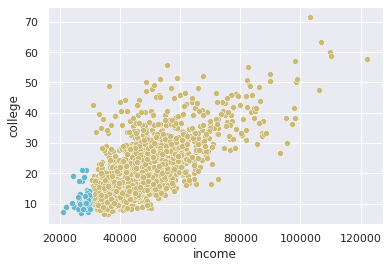

In [ ]:
# Run this cell!

# Notice the new argument for scatterplot: color

sns.scatterplot(data=rep, x='income', y='college', color='C8')
low_income = rep[rep['income'] < 30000]
sns.scatterplot(data=low_income, x='income', y='college', color='C9');

We should **add a legend** to indicate what the colors mean. The `scatterplot()` function and many other seaborn functions (including every plot in this kit) have a `label` parameter to help with this. The syntax looks like this:
```python
sns.scatterplot(..., label='label 1')
sns.scatterplot(..., label='label 2');
# The ellipsis is the other normal arguments like data=rep, x='income', etc.
```
This would create a scatter plot with a legend showing points from the first plot as 'label 1' and points from the second plot as 'label 2'.

>**Your turn**:  
Use the `label` parameter to add an informative legend to the figure you've made so far.

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution
# sns.scatterplot(data=rep, x='income', y='college', label='All')
# low_income = rep[rep['income'] < 30000]
# sns.scatterplot(data=low_income, x='income', y='college', label='Income < 30,000');

Great job! Hopefully it's clear now how you can subset your data for more targeted visualizations and analysis.

There are also several other boolean operators you can use to subset your data based on conditions.

**Boolean Operators:** used to compare numeric values.
* `<`: less than
    - Example: `rep['income'] < 30000`
* `>`: greater than
    - Example: `rep['income'] > 30000`
* `==`: equal to
    - Example: `rep['income'] == 30000`
* `<=`: less than or equal to
    - Example: `rep['income'] <= 30000`
* `>=`: greater than or equal to
    - Example: `rep['income'] >= 30000`

**Combining operators/conditions:**
* `|`: OR, used to match either condition or both
    - Example: `(rep['income'] < 30000) | (rep['income'] > 60000)`
    - Will match counties where the median income is either less than \$30,000 or greater than \$60,000.
* `&`: AND, used to match both conditions
    - Example: `(rep['income'] < 30000) & (rep['college'] > 15)`
    - Will match counties where the median income is less than \$30,000 and more than 15% of population has a college degree.

>**Important Note!** When combining conditions each condition must be wrapped with parentheses `()`!

Now let's try creating a data visualization using more complex boolean operators and conditional statements. When we're done we'll have a plot like this:

![](.images/black_v_white_filtered.png)

>**Your turn**:  
We'll work with a plot from earlier. Create a `scatterplot()` comparing `black` on the y-axis and `white` on the x-axis in counties from the **Democratic** primary. Color the points by the `winner` of each county. It should look like this:
![](.images/black_v_white_dem.png)

>*Hint: use the **`hue`** argument to color by `winner`.*

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution
# sns.scatterplot(data=dem, x='white', y='black', hue='winner');

As we noticed earlier, this plot is interesting because it has two "arms" stretching out from the bottom right with almost no counties in between. Furthermore, a large proportion of Hillary's counties are in the upper arm.

**We'd like to pick out counties in the upper arm that Hillary won for further analysis.**

How can we do this? We could imagine drawing a line to cut off the bottom arm and select it that way, but this would also select the counties falling in between the arms. Something like this:

<center>

![](.images/black_v_white_dem_simple_cut.png)

</center>

Instead, we can draw a line through the plot of the form $ y > mx + b$ to pick out everything above that line. Like so:

<center>

![](.images/black_v_white_dem_diag_cut.png)

</center>

Let's get an expression to select the upper arm. 

We'll start with the equation of a line:

$$ y > mx + b $$

Based on our plot's axes, we know `black` is the y variable and `white` is the x variable.

$$ \text{black} > m\cdot\text{white} + b $$

Now we just need to figure out what $m$ and $b$ should be. We can pick two points we want the line to connect and get an expression. We'll use $(0, 50)$ and $(50, 0)$.

$$ \text{black} - 50 = \frac{0 - 50}{50 - 0}(\text{white} - 0) $$

$$ \text{black} - 50 = \frac{-50}{50}\cdot \text{white} $$

$$ \text{black} = -1 \cdot \text{white} + 50 $$

$$ \text{black} + \text{white} > 50 $$

and more generally,

$$ \text{black} + \text{white} > \text{threshold} $$

Intuitively, the filter described above let's us select counties that are exclusively white and black. If $\text{threshold} = 50$, then that would mean only 50% of the population can be some other race. As we increase the threshold, this will select counties that are more exclusively white and black.

In code this would look like
```python
my_filter = df['white'] + df['black'] > threshold
```
where `df` is any of the four dataframes used in this project, `rep`, `dem`, `rep_st`, or `dem_st`. And now we could use
```python
df[my_filter]
```
to select the counties (or states if you use a state-level dataframe) that satisfy the filter.

**Warning: ** We don't want to ever create a variable called `filter` because it's a built-in Python function. You should always avoid naming variables after [built-in functions](https://docs.python.org/3/library/functions.html) to prevent bugs.

>**Your turn:**  
Start by adding the white percentage and black percentage together and compare this sum to a threshold, like 50%. Assign this to a new variable as shown in the example above and use this filter to pick out these counties from `dem`. Finally, plot the result of subsetting.  
*Hint: use the same code for the original scatter plot but instead pass the subset dataframe as the argument to `data`. Something like this: `data=df[my_filter]`*

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution
# bnw_threshold = 50
# bnw_mask = dem['white'] + dem['black'] > bnw_threshold
# bnw = dem[bnw_mask]
# sns.scatterplot(data=bnw, x='white', y='black', hue='winner');

With the threshold at 50% we're still getting a fair amount of counties that aren't in the upper "arm". Let's try changing the threshold to something more stringent.

>**Your turn:**  
Instead of 50, try changing the threshold to something else and create a new plot using the updated threshold.

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution

# bnw_threshold = 80
# bnw_mask = dem['white'] + dem['black'] > bnw_threshold
# bnw = dem[bnw_mask]
# sns.scatterplot(data=bnw, x='white', y='black', hue='winner');

Great job of picking out the upper arm! However, we're not done yet, there are still some counties in this arm that Hillary didn't win. 

Let's try applying an additional filter to our statement. In addition to our statement above, we can try adding **another** conditional that selects counties that have a percentage of blacks greater than some percentage.


For example:
```python
original_filter = df['white'] + df['black'] > 53

additional_filter = df['black'] > 49 # selects counties that are >50% black

new_filter = original_filter & additional_filter # selects counties with black + white > 53% AND black > 49%

my_filter = (df['white'] + df['black'] > 53) & (df['black'] > 49) # or in one line (need the parentheses!)
```

>**Your turn:**  
Add to your original filter to select only the counties that Hillary won in the upper arm. Then, plot `white` on the x-axis and `black` on the y-axis again after applying your final. Your final plot should look something like this:
![](.images/black_v_white_filtered.png)

In [ ]:
# Solution
# 
# black_white_filter = (dem.white + dem.black > 80) & (dem.black > 16)
# black_white = dem[black_white_filter]
# sns.scatterplot(data=black_white, x='white', y='black', hue='winner');

Great job! We can see that that the graph is entirely blue now, showing that Hillary Clinton won all of the counties that satisfied our filter. From this process, we've learned that Hillary dominated in counties that were even slightly black. Furthermore, this was especially true if those communities didn't have much of a population of asians or hispanics.

We could also look at other variables within the subset of data and try to understand if there are any other reasons why these counties all voted for Hillary. For example, **where** are these counties? What are their **population sizes**? Since Bernie is more liberal than Hillary, **does this mean these counties are more moderate?**

### `isin()`

Sometimes you will need to compare a feature to several possibilities at the same time. For example, suppose we wanted to select counties from California, New York, and Texas. We could use the following filter:
```python
my_filter = (df['state'] == 'California') | (df['state'] == 'New York') | (df['state'] == 'Texas')
```
but you can imagine that if we wanted to include more states the filter would become very verbose.

`pandas` has a function to help! The `isin()` function checks whether every element you input is in the DataFrame. The function returns True if the element is found in the dataframe and False if it is not.

We could replace our filter above with the following code instead:
```python
my_filter = df['state'].isin(['California', 'New York', 'Texas'])
```
Much better! In the example above we gave `isin()` a list, but `isin()` also works with any iterable object. This includes lists, sets, dictionary, and other `pandas` objects like DataFrames and Series (i.e. columns from DataFrames). Check out the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html) for more information.

>**Your turn:**  
Create a `choropleth()` showing the percentage of whites in counties from the **Republican** primary within the following states:  
**Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, West Virginia, Alabama, Kentucky, Mississippi, Tennessee, Arkansas, Louisiana, Oklahoma, and Texas**.  
These are all the states in the 'South' US Census region.

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution

# southern_states = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
# southern_states_filter = rep['state'].isin(southern_states)
# choropleth(rep[southern_states_filter], 'white')

### `subset()`
Now that you've had practice with the `isin()` function and filtering, we want to introduce a function we have created for you to help subset the data by US Census regions and historical voting patterns.  

What if we wanted to subset the dataset by the western census region?

In [ ]:
# Run this cell!
subset(rep_st, 'west')

The function will return a dataframe subsetted from the `rep_st` to the states in the `west`. The `subset()` function allows you to easily filter the data with our preset filters. If you want to create your own, you can use a filter formula to subset by race or `isin()` function to subset by geographical location we used earlier.
  
This function is not one provided from python's libraries, it's one we made! If you want to see how it works, you can check out the `utils.py` file. 
  
We have several filters you can use:  
    - `solid_blue`, `solid_red`, `swing`: states that traditionally voted one way in 2016  
    - `northeast`, `midwest`, `south`, `west`: states that are divided by region  

You can also run the cell below to view some helpful information about the `subset()` function.

In [ ]:
# Run this cell if you want more information!
help(subset)

>**Your turn:**  
Use `subset()` to subset the `rep` dataframe by the `south` filter.

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution
# subset(rep, 'south')

For example, we can use `subset()` to explore difference between US Census regions.

>**Your turn:**  
Create a choropleth to show the percentage of white people in historically red states. You should first subset to select `'solid_red'` states and pass the resulting dataframe to `choropleth` to show the `white` feature.

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution
# solid_red_df = subset(rep, 'solid_red')
# choropleth(solid_red_df, 'white')

>**Your turn:**  
1. Make a scatterplot from `rep` with `income` on the x-axis and `college` on the y-axis.  
2. Add a second scatterplot from a `solid_blue` subset of `rep` with `income` on the x-axis and `college` on the y-axis.  
3. Use the `label` argument to create an informative legend.  
4. Use the `color` argument to make the counties from the solid blue states blue and the rest orange. You can use 'blue' and 'orange' (or use 'C0' and 'C1' to access the default color cycle).

>Your finished plot should look like this:
![](.images/solid_blue_college_v_income.png)

In [ ]:
### Enter your code below: ###



##############################

In [ ]:
# Solution
# sns.scatterplot(data=rep, x='income', y='college', color='C1', label='All States')
# sns.scatterplot(data=subset(rep,'solid_blue'), x='income', y='college', color='C0', label='Solid Blue States');


### Misleading Data
Jojo's Evil Adventure
![](.images/data_meme.jpg)

</center>

<p style='font-size:18px'></p>

<center>

![](.images/data_meme.jpg)

</center>
<!-- <img src='.images/data_meme.jpg' style="margin-left:auto; margin-right:auto;" width=100%> -->

**How to have data lie for us? **



Instead of having a robust and thorough analysis to show the whole story, we can hand-pick specific numbers/conditions to manipulate the interpretation. Without being tempered, such meticulously selected numbers can still fit a pre-determined narrative, thus mislead the general public.

For the analysis below, imagine there's a manipulative data scientist named Jojo who is trying to sell conspiracies to people. How would Jojo prove his false theory which is against people's common sense? He decides to use numbers and the "scientific" way because people don't think numbers can lie.

>**Your turn:**  
Create a `regplot()` with `black` on the x-axis and `college` on the y-axis. Don't forget to compute the correlation coefficient.

>Your plot should look like this:  
![](.images/college_v_black.png)

>What does this plot & correlation tell you about the relationship between `black`, the percentage of blacks in each county, and `college`, the percentage of individuals with college degrees?

>We'll see soon how this plot is potentially misleading and how by simply subsetting the data differently we can manipulate its interpretation.

In [ ]:
### Enter your code below: ###



##############################

-0.05474003277172016

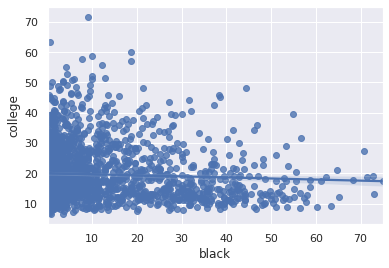

In [ ]:
# Solution

# sns.regplot(data=rep, x='black', y='college')
# rep['black'].corr(rep['college'])

# The correlation coefficient is very weak so this
# regression suggests that there is no relationship
# between black and college.

Before we go on, note that **this linear regression looks rather invalid. The data points do not follow the line well and the correlation coefficient is ~0**, which is another indicator that **we should discount this regression**.

>**Food for thought:**  
Does this mean that there isn't a relationship between `black` and `college` at all? Not quite. The poor fit of our linear regression only rules out that there isn't a *linear* relationship between `black` and `college`. There might be something non-linear going on, and we could also consider additional variables.

Jojo has other plans for this data. He wants to convince others that there is a **positive linear relationship** between `black` and `college` in the **Republican** primary. To do this, he needs to find a subset of `rep` that has this relationship between `black` and `college`. In his first attempt, he's tried subsetting `rep` to the western region of the United States below:

-0.019171771414012644

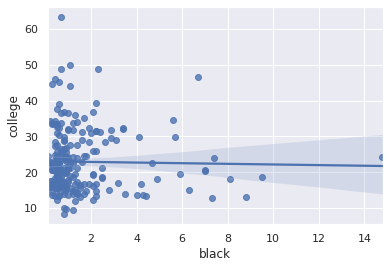

In [ ]:
# Run this cell!
df = subset(rep, 'west')
sns.regplot(data=df, x='black', y='college')
df['black'].corr(df['college'])

Based on the regression plot and correlation coeffcients, that didn't change the relationship between `black` and `college`. Whether Jojo used the entire dataset in `rep` or subset it to the western states, the correlation is still ~0.

>**Your turn:**  
Jojo needs help and will pay you handsomely if you help him!  
Find the US Census region that has the strongest positive linear relationship between `black` and `college` in `rep`. Create a `regplot()` showing this and compute the correlation coefficient.

>What is this new regression plot telling you about the relationship between `black` and `college`?

>Do you think the new regression is valid? How well do the data fit the line?

In [ ]:
### Enter your code below: ###



##############################

0.34789963308089855

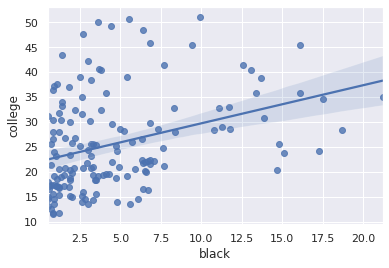

In [ ]:
# Solution

# df = subset(rep, 'northeast')
# sns.regplot(data=df, x='black', y='college')
# df['black'].corr(df['college'])

# After subsetting to select counties from the northeast, there is now
# a moderate positive correlation between black and college! This could
# be misleading if we don't explicitly state that this is for the 
# northeastern region of the US.

# Furthermore, despite the moderate correlation the data are not following
# the line very well. Much of the data is clustered to the left of the graph
# so we don't actually know much about what happens in counties with higher
# percentages of black individuals.

Jojo has another job for you!

Now he wants to subset `rep` to show a regression plot with the **strongest negative correlation**. For example, he's tried filtering `rep` using a threshold on `black` like so:

-0.146531451323312

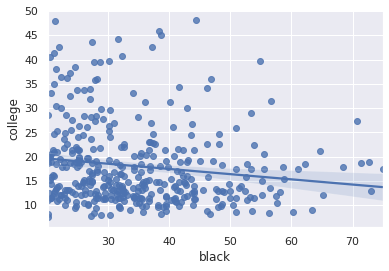

In [3]:
# Run this cell!
black_greater_than = rep['black'] > 20
df = rep[black_greater_than]
sns.regplot(data=df, x='black', y='college')
df['black'].corr(df['college'])

>**Your turn:**  
Select a subset of `rep` that has the strongest negative correlation between `black` and `college` you can find.

>Again, interpret the plot! What does the correlation and regression tell you about the relationship between `black` and `college`? Should you trust this regression?

In [ ]:
### Enter your code below: ###



##############################

-0.22293278614723824

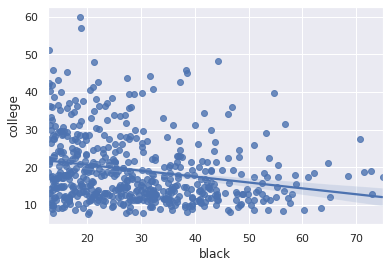

In [16]:
# Solution

# df = rep[rep['black'] > 12.5]
# sns.regplot(data=df, x='black', y='college')
# df['black'].corr(df['college'])

# This yielded a correlation of -0.22, can you find one more extreme than that?

# By now, your trained eye should be able to tell that this regression is also quite poor.
# The correlation is moderate but the data do not follow the line well.



As well-to-do data scientists, how can we make sure that we don't create misleading data visualizations?

In the examples above, the visualization were misleading because they don't show that they are selecting a subset of the data. Let's remedy this!

>**Your turn:**  
Add a `regplot()` of the full dataset "behind" the subsetted regression plots. This will help show whether the trend in the subset is true in the rest of the data or not. It will also help to **add an informative legend that explains what the subset is**.

In [ ]:
### Enter your code below: ###



##############################

0.34789963308089855

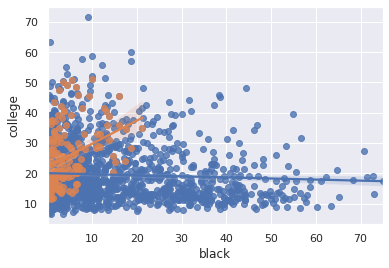

In [ ]:
# Solution

sns.regplot(data=rep, x='black', y='college')

low_income = subset(rep, 'northeast')
sns.regplot(data=low_income, x='black', y='college')
low_income['black'].corr(low_income['college'])

As you can see, the slope of the regression line is going upwards as the percentage of black people increases. The scattering of points around the left edge is contributed by counties with very low percentages of black people, which is not too useful for our discussion. However, the regression line indicates that the counties with higher percentages of black people would have higher percentages of college attainability.

How can we compare the trend in lower income areas to the one in all states?

But wait, why is the regression line slope so different from the counties with lower-income areas compare to the one in all states? 

The trend suggests that in lower-income areas, the higher of black people percentage, the higher college attainability is in the county. This contradicts with the negative trend in the whole dataset in "**college** vs. **black percentage**", which indicates that in the whole population, the higher of the black people percentage is in a county, the lower college attainability is in the same county. This is quite interesting, as we would assume that a similar trend should be witnessed in both a whole dataset and in its subset. In reality we are witnessing the opposite. Such contrasting phenomena are not uncommon, but what causes such phenomena?

<center><img src="https://tabernadozezim.files.wordpress.com/2013/05/homer-simpson-doh-sound-effect-download-i15.jpg" width=300></center>

**Simpson's Paradox**

This opens up the broad discussion of Simpson's paradox, where the trend of subset data groups disappears or reverses in the combined dataset. This is usually due to the fact that we over-simplify our analysis and assume a causal relationship when we see a positive correlation between two variables. Specifically, we expect the same trend between the "**college** vs. **black percentage**" in the entire dataset to hold in any subsets, because we believe the "**black percentage**" would cause changes in the "**college**". However, if you read the section of "**Correlation $\ne$ Causation! **" in  **Chapter II**, you would know that we need to consider all other possible causal explanations and rule those out before establishing the causality. Such analyses are well beyond the scope of our project, and it is common sense to conclude that race is not the only factor determining college attainability. With the existance of other confounding elements, it is safe to say that we fail to establish the causality between "**college** vs. **black percentage**" and should not expect to see the same trend to hold between different subsets.  

In conclusion, it shows how harmful it is to make oversimplify conclusions about data by only looking at data from a single perspective. In reality, there's many hidden layers of data that we need to keep in mind. The data we see is not all that there is. Once we understand how our data is generated, we can look at outside factors that may come into play.


Here's a link, where it explains the paradox in depth, feel free to read it if you are curious!
[link](https://towardsdatascience.com/simpsons-paradox-and-interpreting-data-6a0443516765)

## Group By

![](.images/groupby.jpg)

You can also group certain columns or rows together by using the `groupby()` function. This function is useful when you want to gather some statistics about some column.

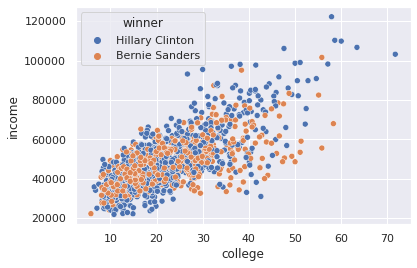

In [ ]:
sns.scatterplot(x='college', y='income', hue='winner', data=dem);

In [ ]:
# Let's gather the mean values of the columns
# of rep by each state
rep_avg = rep.groupby(by=["state"]).mean()
rep_avg
# some other tools: min(), max(), median(), sum()

,population,income,hispanic,asian,black,white,foreign,college,density,vets,female,senior,children,votes,fraction_votes,total_votes,voter_turnout
state,,,,,,,,,,,,,,,,,
Alabama,80072.101695,39278.050847,3.755932,0.791525,22.600000,70.994915,2.574576,16.305085,99.552542,6452.610169,51.115254,16.952542,22.393220,6258.491525,0.477881,14122.898305,0.237391
Arizona,581851.636364,44051.000000,23.800000,1.672727,2.609091,59.472727,8.445455,19.990909,63.263636,45440.909091,49.581818,20.572727,22.345455,22136.272727,0.503000,38503.636364,0.099980
Arkansas,45162.758065,37180.096774,5.359677,0.854839,11.927419,79.675806,3.038710,15.006452,61.350000,3620.306452,50.564516,18.174194,22.833871,2268.580645,0.379903,6271.741935,0.184593
California,475256.487179,51822.641026,27.889744,5.074359,3.233333,59.823077,13.797436,22.064103,224.043590,28091.461538,49.210256,16.589744,22.443590,20271.615385,0.792308,24923.666667,0.096412
Connecticut,164943.000000,76994.000000,5.800000,3.000000,5.400000,84.600000,7.300000,39.100000,448.600000,11973.000000,51.200000,17.700000,19.400000,7295.000000,0.593717,12287.000000,0.092422
Delaware,311871.333333,57465.333333,8.533333,2.900000,20.966667,65.933333,7.366667,25.800000,583.566667,25027.000000,51.633333,17.866667,21.766667,14157.333333,0.624667,22602.333333,0.103269
Florida,289915.484375,43780.843750,13.426563,1.703125,14.601563,68.926563,9.632812,19.957812,334.648438,23014.281250,48.818750,20.673438,19.807813,17111.875000,0.499984,33598.875000,0.166898
Georgia,71885.917293,41988.466165,6.162406,1.377444,25.939850,65.421805,4.418797,17.668421,211.930827,4921.270677,50.666165,15.629323,23.499248,3815.112782,0.457489,9290.796992,0.194831
Idaho,46610.735294,43988.176471,12.311765,0.900000,0.617647,83.261765,5.897059,21.155882,44.341176,3467.382353,49.385294,16.470588,25.629412,2887.058824,0.457235,6051.764706,0.202946


A groupby operation involves some combination of splitting the object, applying a function, and combining the results, as the **"split-apply-combine"** operation chain. 

The splitting step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. Groupby allows us to split the dataset with multiple variables/columns, allowing for more complicated queries. 

For the applying step, we may want to apply a certain function to some part of the dataset. The first step is to make a function, and select a column or row to apply this function on. As a result, this function will apply itself to every value in the row/column. 

Lastly, we want to turn the results into a complete data structure, so we can use it for later.   

Groupby is one of the most useful functions to use for data analysis, as it can give us an overview of the data. It also makes it easier to explore the dataset and unveil the underlying relationships among variables. 

In [ ]:
# Let's try working on the applying step, by getting every state's average population as a whole number
# Using the rep_avg dataframe, select the population column using .get
# Write a function that will take in an argument, and return it as a whole number
# Then use .apply() and put your function 

rep_avg['population'].apply()

state
Alabama            80072.101695
Arizona           581851.636364
Arkansas           45162.758065
California        475256.487179
Connecticut       164943.000000
Delaware          311871.333333
Florida           289915.484375
Georgia            71885.917293
Idaho              46610.735294
Illinois           82935.153846
Indiana            72843.133333
Iowa               57913.190476
Kentucky           57522.741379
Louisiana          92280.571429
Maryland          203874.000000
Massachusetts     388185.000000
Michigan          122237.456790
Mississippi        41642.536232
Missouri           44857.278846
Montana            29299.593750
Nebraska           45000.270270
Nevada             44020.000000
New Hampshire     132681.300000
New Jersey        360295.500000
New Mexico         86824.882353
New York          204872.037037
North Carolina    106649.688889
Ohio              132942.252874
Oklahoma           68610.452830
Oregon            100839.838710
Pennsylvania      177908.730159
Rh

# Finished! (almost...)

<center>

<img src='https://i.kym-cdn.com/photos/images/facebook/001/585/311/63e.png' width=300>

Congratulations! You made it past the starter portion of this kit. You've learned and practiced many new tools to visualize data. Now, it's time to take up your own project.
   
### What to do next
Start a new notebook! Start thinking of ideas, plots, and analyses you can make on the 2016 primary datasets we've provided you.
  
To start a new notebook, navigate to and click the + icon in the files section. Scroll down and click on 'New Notebook'.
\[maybe a picture or something]
  
From here, make sure to import all the necessary packages! Feel free to use any of the functions and tools you've learned so far to discover any new trends in the data. This project should be fueled by your interests and curiosities with the data.  

//what the structure of their project going to look like (hypothesis?), what it's judged on
  

### Where to get help if you get stuck on a coding problem? 

Do not be afraid to ask the TritonHacks tutors and volunteers for help! 

**Otherwise, Google is your best friend!**  
- Coding tutorial website: geekforgeeks, w3schools  
- Personal blogposts  
- Official Python packages documentation: https://docs.python.org/3/ , pandas, seaborn, etc.  
- Online forums: stackoverflow  

## Good luck and have fun!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6db671ff-4b94-4ec9-9d8f-30a849bb0caf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>